<a href="https://colab.research.google.com/github/RanaHassan-harsan/Zeham-Management-Technologies-Bootcamp/blob/main/Week5/Day%202/RNN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RNN Introduction**


## Importing required libraries


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [30]:
#to load data
df = pd.read_csv('/content/drive/MyDrive/Trainees - المتدربين/Week 5/5- Introduction to Time Series Forecasting/2- Time Series Forecasting (RNN)/LAB/Datasets/traffic.csv')

In [31]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [33]:
traffic_data = df['Vehicles'].values

In [34]:
traffic_data = traffic_data.reshape(-1, 1)

In [35]:
scaler = MinMaxScaler(feature_range=(0, 1))
traffic_data = scaler.fit_transform(traffic_data)

## Visualization

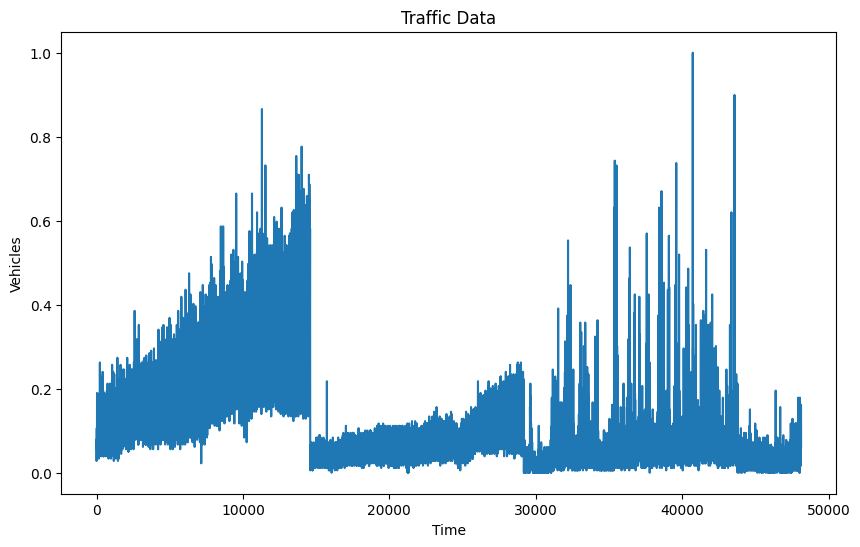

In [36]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(traffic_data)
plt.title('Traffic Data')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.show()

## Split the data into train and test

In [43]:
time_step = 60

X = []
y = []

for i in range(time_step, len(traffic_data)):
    X.append(traffic_data[i-time_step:i, 0])
    y.append(traffic_data[i, 0])
X = np.array(X)
y = np.array(y)


In [44]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X = []
y = []

## Modeling


In [49]:
# Define the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(32))  # Simple RNN layer with 32 units
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           2,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,289 (20.66 KB)

 Trainable params: 5,289 (20.66 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 33s 32ms/step - acc: 0.0035 - loss: 0.3495 - val_acc: 0.0029 - val_loss: 0.3241
Epoch 2/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - acc: 0.0031 - loss: 0.3205 - val_acc: 0.0029 - val_loss: 0.3223
Epoch 3/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - acc: 0.0029 - loss: 0.3201 - val_acc: 0.0029 - val_loss: 0.3217
Epoch 4/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - acc: 0.0028 - loss: 0.3199 - val_acc: 0.0029 - val_loss: 0.3234
Epoch 5/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - acc: 0.0031 - loss: 0.3202 - val_acc: 0.0029 - val_loss: 0.3219
Epoch 6/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - acc: 0.0033 - loss: 0.3194 - val_acc: 0.0029 - val_loss: 0.3232
Epoch 7/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - acc: 0.0026 - loss: 0.3205 - val_acc: 0.0029 - val_loss: 0.3226
Epoch 8/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - acc: 0.0027 - loss: 0.3191 - val_acc: 0.0029 - val_loss: 0.3230
Epoch 9/10
962/962 ━━━━━━━━━━━━━━━━━━━━ 

## Visualization of results


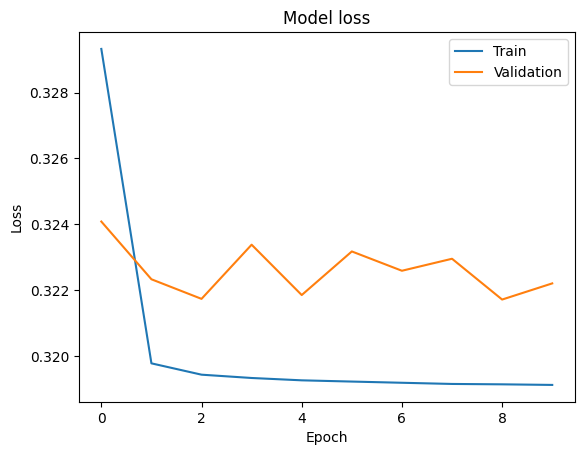

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')